# Medical Cost Personal Datasets:

## initializing dataset

In [120]:
import os

import joblib
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [121]:
df = pd.read_csv("/Users/Bilal/PycharmProjects/LearningAI/Files/assignment_6/task_1/insurance 2.csv")

In [122]:
SAVE_DIR = "/Users/Bilal/PycharmProjects/LearningAI/models/assignment_6/task_1"
MODEL_PATH_NN = f"{SAVE_DIR}/medical_cost_neural_network.keras"
MODEL_PATH_SK = f"{SAVE_DIR}/medical_cost_sklearn.pkl"
MODEL_PATH_XG = f"{SAVE_DIR}/medical_cost_xg.json"
SCALER_PATH = f"{SAVE_DIR}/scaler.pkl"
HISTORY_PATH = f"{SAVE_DIR}/history.pkl"
LABEL_ENCODER_PATH = f"{SAVE_DIR}/label_encoder.pkl"
OHE_ENCODER_PATH = f"{SAVE_DIR}/ohe_encoder.pkl"

## Data Distribution

| Range | Value | Range | Value | Range | Value |
| ----- | ----- | ----- | ----- | ----- | ----- |
| <2000 | 92    | 6-7   | 73    | 20-25 | 72    |
| 2k-3k | 98    | 7-8   | 68    | 25-30 | 39    |
| 3k-4k | 78    | 8-9   | 78    | 30-35 | 29    |
| 4-5k  | 90    | 9-10  | 64    | 35-40 | 54    |
| 5-6   | 70    | 10-11 | 60    | 40-45 | 41    |
| 11-12 | 74    | 12-13 | 57    | 45-50 | 31    |
| 13-14 | 45    | 14-15 | 32    | 50-55 | 2     |
| 15-16 | 12    | 16-17 | 15    | 55-60 | 2     |
| 17-18 | 18    | 18-19 | 19    | 60-65 | 3     |
| 19-20 | 21    |       |       |       |       |



## Encoding Textual data

In [123]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

xx = ohe.fit_transform(df[["region"]])

df = pd.concat([df, xx], axis=1).drop(columns=["region"])


In [124]:
label_encoder = LabelEncoder()
df["sex"] = label_encoder.fit_transform(df["sex"])

In [125]:
df["smoker"] = label_encoder.fit_transform(df["smoker"])

In [126]:
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0.0,1.0,0.0,0.0
1334,18,0,31.920,0,0,2205.98080,1.0,0.0,0.0,0.0
1335,18,0,36.850,0,0,1629.83350,0.0,0.0,1.0,0.0
1336,21,0,25.800,0,0,2007.94500,0.0,0.0,0.0,1.0


## Splitting into train and test

In [127]:
X = df.drop(columns=["charges"])
X

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0.0,1.0,0.0,0.0
1334,18,0,31.920,0,0,1.0,0.0,0.0,0.0
1335,18,0,36.850,0,0,0.0,0.0,1.0,0.0
1336,21,0,25.800,0,0,0.0,0.0,0.0,1.0


In [128]:
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0.0,1.0,0.0,0.0
1334,18,0,31.920,0,0,2205.98080,1.0,0.0,0.0,0.0
1335,18,0,36.850,0,0,1629.83350,0.0,0.0,1.0,0.0
1336,21,0,25.800,0,0,2007.94500,0.0,0.0,0.0,1.0


In [129]:
y = df.iloc[:, 5]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

## splitting the data into train and test sets


In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

## Scale the training and test features

In [131]:
minmax = MinMaxScaler(feature_range=(0, 1))
x2 = minmax.fit_transform(X_train[["bmi", "children"]])
X_train[["bmi", "children"]] = x2

In [132]:
x3 = minmax.transform(X_test[["bmi", "children"]])
X_test[["bmi", "children"]] = x3

In [133]:
# DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Regression

## Training the Model

In [134]:
'''
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

print(y_test_log)
'''

'\ny_train_log = np.log1p(y_train)\ny_test_log = np.log1p(y_test)\n\nprint(y_test_log)\n'

In [135]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer='adam',
    metrics=['mae']
)




Loading Already Present Model


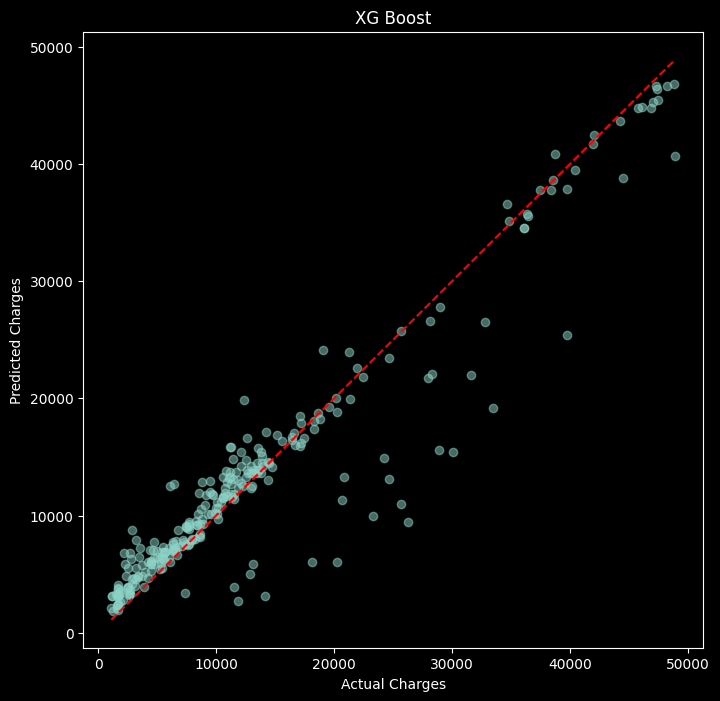

In [136]:

if os.path.exists(MODEL_PATH_XG) and os.path.exists(SCALER_PATH) and os.path.exists(HISTORY_PATH) and os.path.exists(
        OHE_ENCODER_PATH) and os.path.exists(LABEL_ENCODER_PATH):
    print("Loading Already Present Model")
    model = xgb.Booster()
    model.load_model(MODEL_PATH_XG)

    scaler = joblib.load(SCALER_PATH)
    history = joblib.load(HISTORY_PATH)
    ohe = joblib.load(OHE_ENCODER_PATH)
    le = joblib.load(OHE_ENCODER_PATH)

    #evaluation
    y_pred_xg = model.predict(dtest)
    model.predict(dtest)
    plt.figure(figsize=(8, 8))
    plt.scatter(y_test, y_pred_xg, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual Charges")
    plt.ylabel("Predicted Charges")
    plt.title("XG Boost")
    plt.show()
else:
    print("Making a new Model")
    # Neural Network
    history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), verbose=False)

    # Scikit LinearRegression
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # xgboost
    model_xgboost = xgb.train(
        params={"objective": "reg:squarederror", "eval_metric": "mae"},
        dtrain=dtrain,
        num_boost_round=10,
        verbose_eval=False,
        evals=[(dtrain, "train"), (dtest, "test")]
    )

    # getting prediction of all models
    y_pred = model.predict(X_test).ravel()
    library_pred = lr.predict(X_test).ravel()
    y_pred_xg = model_xgboost.predict(dtest)

    # getting r2 scores of all models
    nn_r2 = r2_score(y_test, y_pred)
    scikit_r2 = r2_score(y_test, library_pred)
    xg_r2 = r2_score(y_test, y_pred_xg)

    # Saving the models
    model.save(MODEL_PATH_NN)
    joblib.dump(lr, MODEL_PATH_SK)
    model_xgboost.save_model(MODEL_PATH_XG)

    # saving the scalers and encoders
    joblib.dump(minmax, SCALER_PATH)
    joblib.dump(ohe, OHE_ENCODER_PATH)
    joblib.dump(label_encoder, LABEL_ENCODER_PATH)

    #savng history
    joblib.dump(history.history, HISTORY_PATH)

    #evaluation
    plt.figure(figsize=(8, 8))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual Charges")
    plt.ylabel("Predicted Charges")
    plt.title("Neural Network")
    plt.show()

    plt.figure(figsize=(8, 8))
    plt.scatter(y_test, library_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual Charges")
    plt.ylabel("Predicted Charges")
    plt.title("Scikit Linear Regression")
    plt.show()

    plt.figure(figsize=(8, 8))
    plt.scatter(y_test, y_pred_xg, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual Charges")
    plt.ylabel("Predicted Charges")
    plt.title("XG Boost")
    plt.show()
